<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3160---Image-Processing-and-Machine-Vision/blob/main/Image_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HSV Color Model

**HSV** stands for:

- **H** → *Hue* (the type of color)
- **S** → *Saturation* (color intensity)
- **V** → *Value* (brightness)

It’s a different way of representing color compared to **RGB**, but it describes colors in a way closer to human perception.

---

## 1. Components Explained

### **Hue (H)**
- Defines the **actual color** (e.g., red, green, blue).
- Represented as an **angle** on a color wheel:

| Angle  | Color    |
|--------|----------|
| 0°     | Red      |
| 60°    | Yellow   |
| 120°   | Green    |
| 180°   | Cyan     |
| 240°   | Blue     |
| 300°   | Magenta  |

- In **OpenCV**, H is often scaled to **0–179** instead of 0–360° for storage efficiency.

---

### **Saturation (S)**
- Measures **how pure** or intense the color is.
- **0%** → Gray (no color, fully desaturated)  
- **100%** → Fully vivid color  
- In **OpenCV**, S ranges **0–255**.

---

### **Value (V)**
- Measures **brightness** (lightness) of the color.
- **0%** → Black (no brightness)  
- **100%** → Maximum brightness  
- In **OpenCV**, V ranges **0–255**.

---

## 2. Why use HSV instead of RGB?
- In **RGB**, changing one component can unexpectedly shift both brightness and color.
- In **HSV**, you can:
  - Change **Hue** → Change the color without affecting brightness.
  - Change **Value** → Make the image lighter/darker without changing the color type.
  - Change **Saturation** → Make the color more vivid or more grayish.

💡 **Example:** If you want to detect all red objects in an image, you can simply filter by a **Hue range** in HSV, which is much easier than figuring out the RGB ranges.


Converting RGB to HSV in Python

In [1]:
import cv2
import numpy as np

# Create a BGR image with red color
bgr_color = np.uint8([[[0, 0, 255]]])  # Pure red in BGR
hsv_color = cv2.cvtColor(bgr_color, cv2.COLOR_BGR2HSV)

print("HSV value for pure red:", hsv_color)


HSV value for pure red: [[[  0 255 255]]]


H = 0 → Red

S = 255 → Fully saturated

V = 255 → Maximum brightness

Saving FruitBowl.jpeg to FruitBowl (3).jpeg


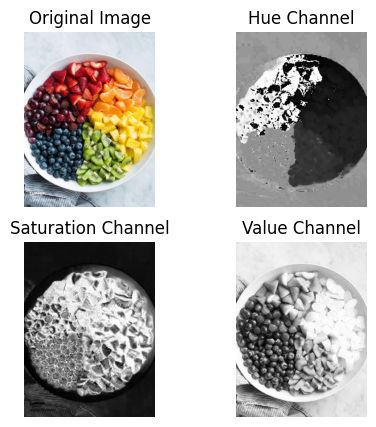

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image
uploaded = files.upload()  # Choose your image file

# Read the uploaded image
image_path = list(uploaded.keys())[0]  # Get file name
im = cv.imread(image_path)

# Convert from BGR to HSV
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

# Create a figure with 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

# Original image (converted to RGB for correct display in Matplotlib)
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')

# Hue channel
ax[0, 1].imshow(im_hsv[:, :, 0], cmap='gray')
ax[0, 1].set_title('Hue Channel')

# Saturation channel
ax[1, 0].imshow(im_hsv[:, :, 1], cmap='gray')
ax[1, 0].set_title('Saturation Channel')

# Value channel
ax[1, 1].imshow(im_hsv[:, :, 2], cmap='gray')
ax[1, 1].set_title('Value Channel')

# Remove axis ticks for all plots
for a in ax.ravel():
    a.axis('off')

plt.show()


Change the Hue -
Rotate the hue values to shift all colors.

For example, make green objects look blue, red look yellow, etc.

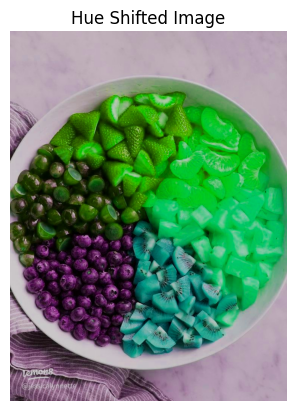

In [17]:
im_hsv[:,:,0] = (im_hsv[:,:,0] + 50) % 180  # Shift hue
shifted = cv.cvtColor(im_hsv, cv.COLOR_HSV2BGR)
plt.imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB))
plt.title("Hue Shifted Image")
plt.axis('off')
plt.show()


 Change Saturation -
Increase saturation to make colors pop, or decrease to make the image look faded or grayscale.

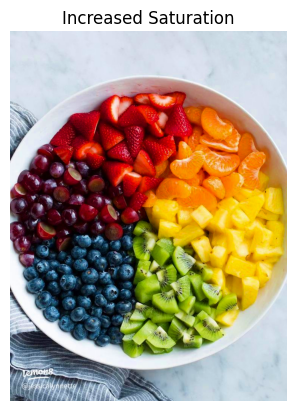

In [14]:
im_hsv[:,:,1] = np.clip(im_hsv[:,:,1] * 1.5, 0, 255)  # Increase
more_sat = cv.cvtColor(im_hsv, cv.COLOR_HSV2BGR)
plt.imshow(cv.cvtColor(more_sat, cv.COLOR_BGR2RGB))
plt.title("Increased Saturation")
plt.axis('off')
plt.show()


Change Value (Brightness) -
Make the image brighter or darker without affecting hue.

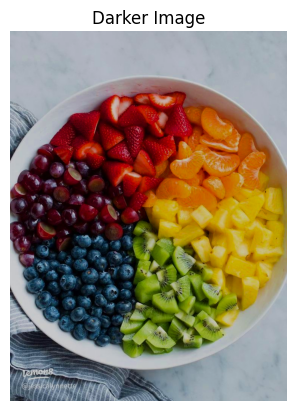

In [15]:
im_hsv[:,:,2] = np.clip(im_hsv[:,:,2] * 0.8, 0, 255)  # Darken
darker = cv.cvtColor(im_hsv, cv.COLOR_HSV2BGR)
plt.imshow(cv.cvtColor(darker, cv.COLOR_BGR2RGB))
plt.title("Darker Image")
plt.axis('off')
plt.show()


Color-based Object Detection -
Using a Hue range to isolate a specific color (e.g., detect all red areas).

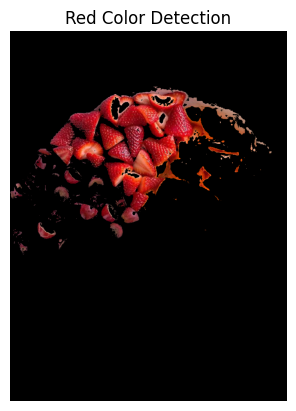

In [16]:
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])
mask1 = cv.inRange(im_hsv, lower_red, upper_red)

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask2 = cv.inRange(im_hsv, lower_red2, upper_red2)

mask = mask1 | mask2
result = cv.bitwise_and(im, im, mask=mask)

plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title("Red Color Detection")
plt.axis('off')
plt.show()
